# Initial setup
Import all the libraries needed

In [1]:
from scipy import stats
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from colorsetup import colors, palette

In [2]:
from sklearn.metrics import make_scorer, recall_score, precision_score
#Defining negative prediction based classification metrics
specificity = make_scorer(precision_score, pos_label = 0)
npv = make_scorer(recall_score, pos_label = 0)

In [3]:
filepath = 'SouthGermanCredit.txt'

In [4]:
df = pd.read_csv(filepath, sep = ' ')
data = pd.read_csv(filepath, sep = ' ')
columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'pstatus', 'other_debtors',
             'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
             'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df.columns = columns
data.columns = columns
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,pstatus,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


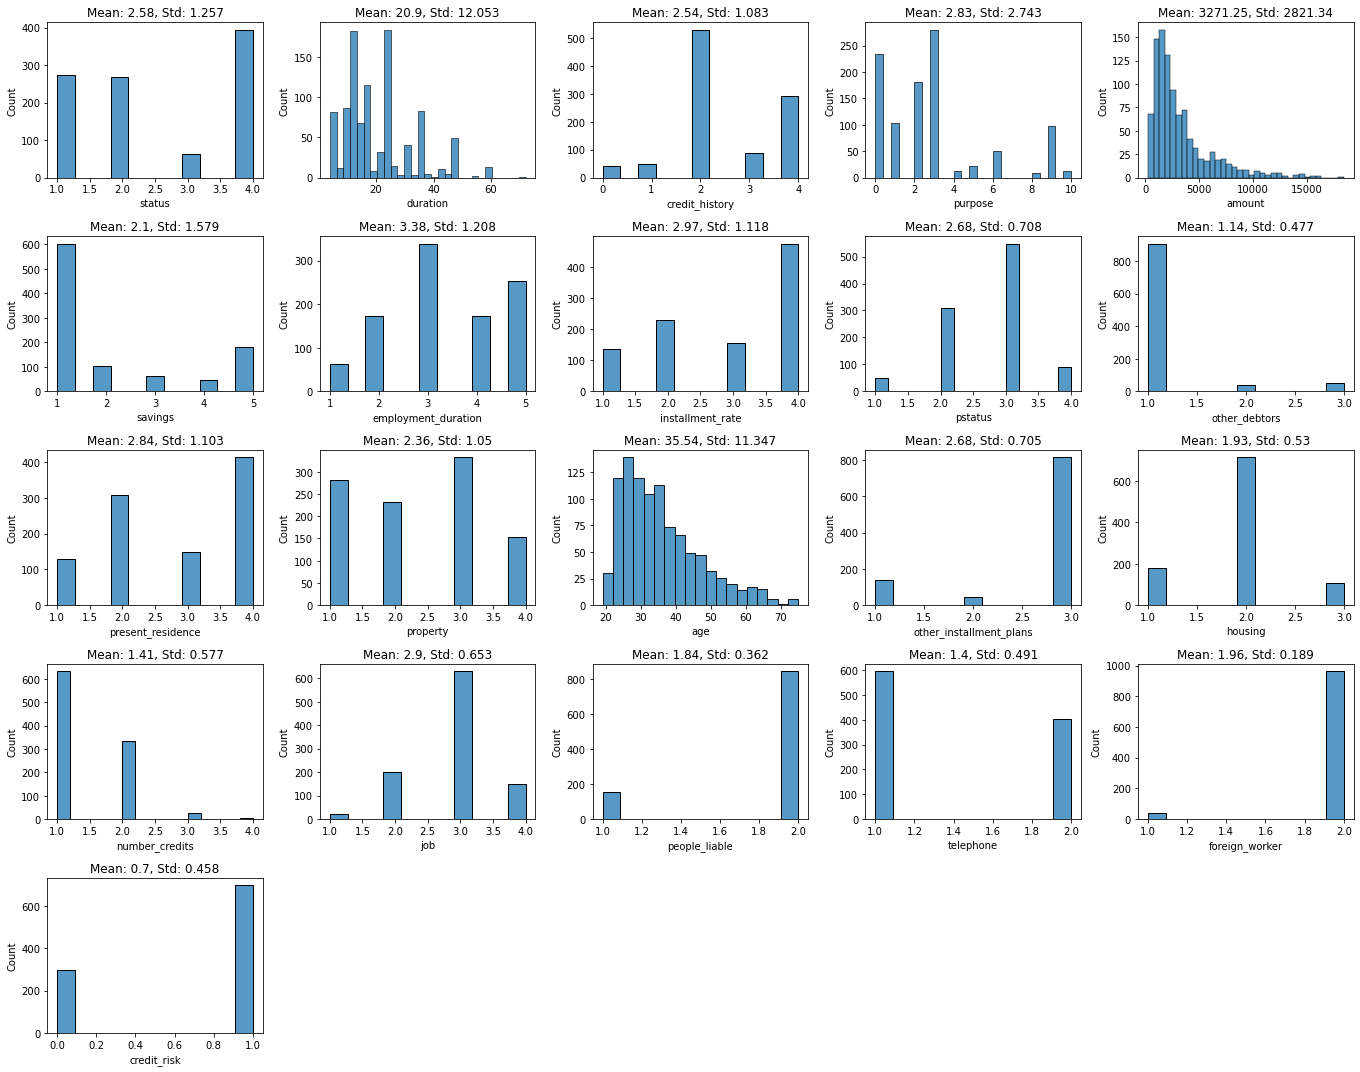

In [9]:
plot_hist(5,5,df)

In [5]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')


,Unique Values
Variable,
status,4
duration,33
credit_history,5
purpose,10
amount,923
savings,5
employment_duration,5
installment_rate,4
pstatus,4


## Encoding the variable types

In [8]:
ordinal_variables = ['status',
                     'savings', 
                     'employment_duration',
                     'installment_rate',
                     'present_residence', 
                     'number_credits']
numerical_variables = ['duration',
                       'amount',
                       'age']
categorical_variables = ['credit_history',
                         'purpose',
                         'pstatus',
                         'other_debtors',
                         'property',
                         'other_installment_plans',
                         'housing',
                         'job']
binary_variables = ['people_liable',
                    'telephone',
                    'foreign_worker']

In [14]:
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder
lb, oe = LabelBinarizer(), OrdinalEncoder(dtype = 'int64')
#Encode the ordinal variables first:
for column in ordinal_variables:
    df[column] = oe.fit_transform(df[[column]])

In [15]:
#Encode the binary variables:
#The encoding had to be manual, because of the naming of the labels
df.replace({'people_liable': {2 : 0}}, inplace = True)
df.replace({'telephone': {1 : 0, 2 : 1}}, inplace = True)
df.replace({'foreign_worker': {2 : 0}}, inplace = True)

In [16]:
#One hot encoding for the categorical variables:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

## Scaling the numerical values

In [27]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
mm = MinMaxScaler()
pt= PowerTransformer(standardize = False)

In [28]:
#Only min_max scaler for the ordinal variables:
for column in [ordinal_variables]:
    df[column] = mm.fit_transform(df[column])

In [29]:
#Power Transformer to the numerical values, followed by min_max scaling:
for column in [numerical_variables]:
    df[column] = pt.fit_transform(df[column])
    df[column] = mm.fit_transform(df[column])

In [30]:
df.to_csv('credit.csv', index = False)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.525667,0.419213,0.0,0.000000,0.333333,1.000000,1.0
duration,1000.0,0.490888,0.203530,0.0,0.350253,0.491041,0.593546,1.0
amount,1000.0,0.560660,0.177976,0.0,0.432226,0.556519,0.677977,1.0
savings,1000.0,0.276250,0.395006,0.0,0.000000,0.000000,0.500000,1.0
employment_duration,1000.0,0.596000,0.302077,0.0,0.500000,0.500000,1.000000,1.0
installment_rate,1000.0,0.657667,0.372905,0.0,0.333333,0.666667,1.000000,1.0
present_residence,1000.0,0.615000,0.367906,0.0,0.333333,0.666667,1.000000,1.0
age,1000.0,0.533704,0.220017,0.0,0.372850,0.539476,0.706588,1.0
number_credits,1000.0,0.135667,0.192551,0.0,0.000000,0.000000,0.333333,1.0
people_liable,1000.0,0.155000,0.362086,0.0,0.000000,0.000000,0.000000,1.0


In [32]:
df.drop(columns = 'telephone', inplace = True)

## Helper funtion to plot histograms

In [7]:
def plot_hist(n, m, data):
    fig, axList = plt.subplots(nrows=n, ncols=m)
    axList = axList.flatten()
    fig.set_size_inches(3.8*m,3*n)
    for ax in enumerate(axList):
        loc = ax[0]
        ax = ax[1]
        if loc < len(data.columns):
            sns.histplot(df, x = data.iloc[:,loc], ax = ax, legend = False)
            mean = np.around(np.mean(data.iloc[:,loc]), 2)
            s_dev = np.around(np.std(data.iloc[:,loc]), 3)
            ax.set(title= 'Mean: ' + str(mean) + ', Std: ' + str(s_dev))
        if loc >= len(data.columns):
            ax.axis("off")
    plt.tight_layout()

# Exploratory Data Analysis

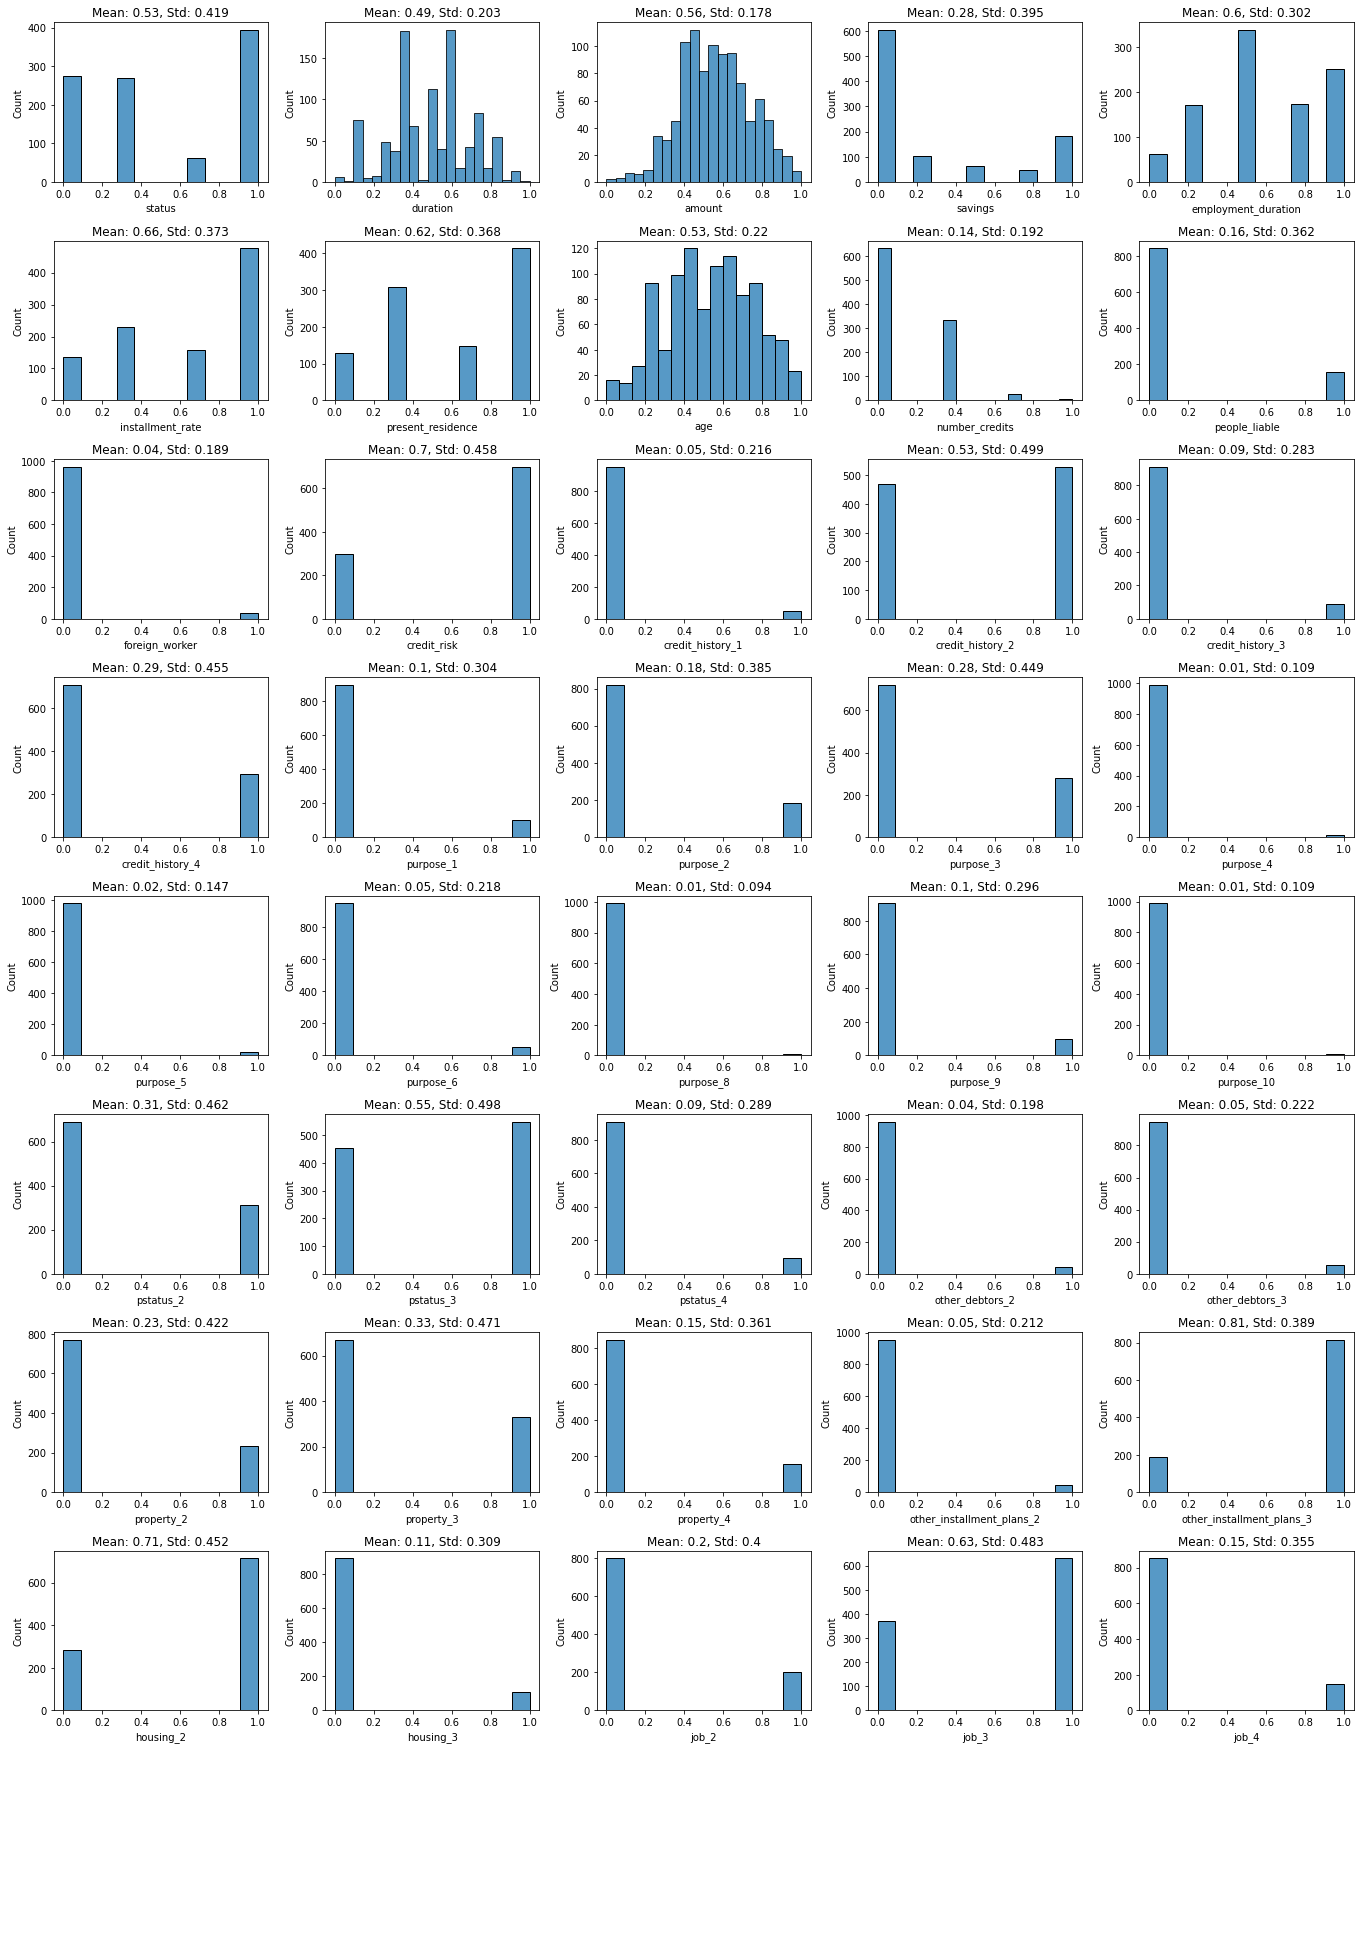

In [34]:
plot_hist(9,5,df)

The test data comes from the original dataset, for the sake of curiosity test samples will be randomly sampled trying to match the distribution of the original data set. For the features that have less than 11 cetegories, these will be sampled using random.choice from numpy. Whereas the values that have more categories, it will be assumed they are continuous and a skewed normal distribution will be fit to these data, in order to generate a random sample that emulates the initial data.

In [48]:
#Create a dictionary with the probability of each label to be used with random.choice and skewnrom.rvs to create the Monte Carlo Simulation
p = {}
for column in df.columns:
    #If the amount of labels is less than 11, we get the probability of each label:
    if len(df[column].value_counts()) <= 11:
        p[column] = {'a': list(df[column].value_counts(normalize = True).index),
                     'p': list(df[column].value_counts(normalize = True))}
    #If the amount of labels is greater than 11, we fit a skewed normal distribution to get the parameters 
    #that can be used to random sample from the column.
    else:
        p[column] = {'a': skewnorm.fit(df[column])[0], 
                     'loc': skewnorm.fit(df[column])[1],
                    'scale': skewnorm.fit(df[column])[2]}

In [49]:
p['duration']

{'a': 28.190131562639234,
 'loc': 0.01639612222616024,
 'scale': 0.29210066785366684}

In [50]:
p['number_credits']

{'a': [0.0, 0.3333333333333333, 0.6666666666666666, 1.0],
 'p': [0.633, 0.333, 0.028, 0.006]}

(0.2995604335447961,
 0.1962356641977744,
 -0.00280947448584392,
 1.0272508216608305)

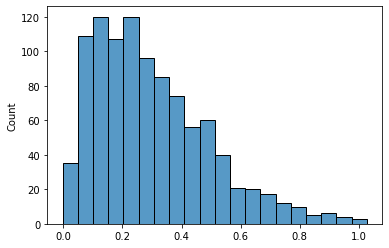

In [51]:
#Create a skewed normal distribution according to the fit parameters for the age column:
col = 'age'
r = skewnorm.rvs(p[col]['a'], size=1000, loc = p[col]['loc'], scale = p[col]['scale'])
sns.histplot(r, legend = False)
np.mean(r), np.std(r), min(r), max(r)

In [52]:
df[col].describe(), pd.DataFrame(r).describe()

(count    1000.000000
 mean        0.295393
 std         0.202726
 min         0.000000
 25%         0.142857
 50%         0.250000
 75%         0.410714
 max         1.000000
 Name: age, dtype: float64,
                  0
 count  1000.000000
 mean      0.299560
 std       0.196334
 min      -0.002809
 25%       0.144072
 50%       0.258837
 75%       0.413695
 max       1.027251)

There is enough variation in between the data age column, and the randomly sampled age column. This variation is exactly what is wanted to test the perfomance of the model on a test data that's beyond the on available on the data set.

(0.5476666666666666, 0.4165401141146753, 0.0, 1.0)

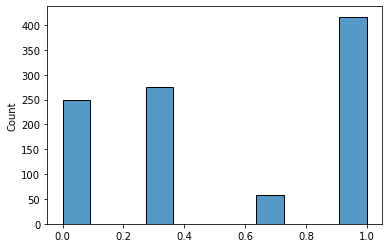

In [53]:
col = 'status'
s = np.random.choice(a = p[col]['a'], size = 1000, p = p[col]['p'])
sns.histplot(s, legend = False)
np.mean(s), np.std(s), min(s), max(s)

<AxesSubplot:>

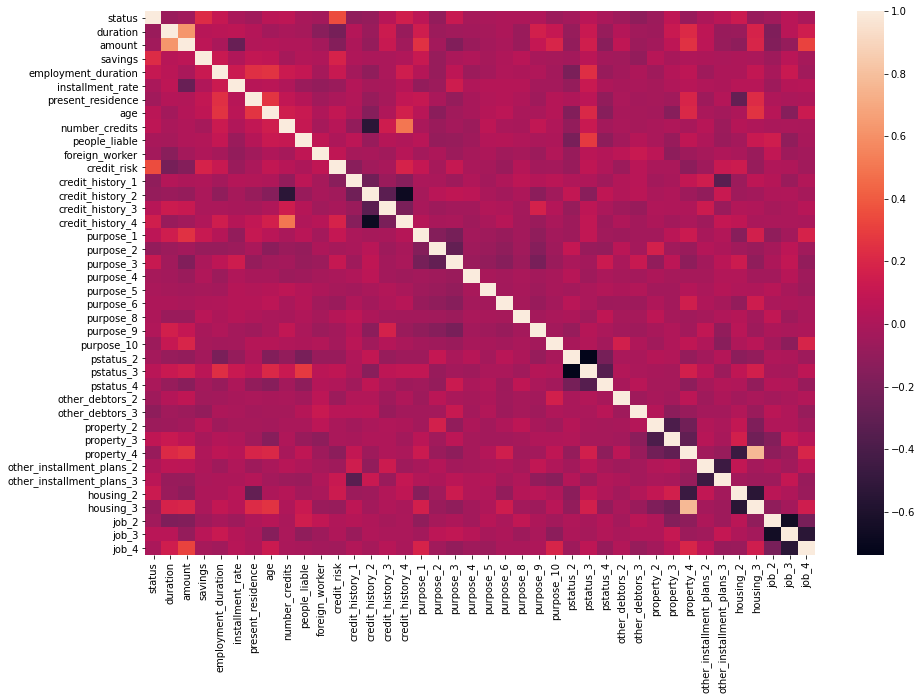

In [54]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr())

In [55]:
credit_risk, features = df['credit_risk'], df.drop(columns='credit_risk')

In [56]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, make_scorer, recall_score, precision_score

In [57]:
scoring = 'f1'

# Logistic Regression
Use stratified Shuffle Split to maintain the proportion of the data

In [58]:
feature_cols = features.columns
feature_cols

Index(['status', 'duration', 'amount', 'savings', 'employment_duration',
       'installment_rate', 'present_residence', 'age', 'number_credits',
       'people_liable', 'foreign_worker', 'credit_history_1',
       'credit_history_2', 'credit_history_3', 'credit_history_4', 'purpose_1',
       'purpose_2', 'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6',
       'purpose_8', 'purpose_9', 'purpose_10', 'pstatus_2', 'pstatus_3',
       'pstatus_4', 'other_debtors_2', 'other_debtors_3', 'property_2',
       'property_3', 'property_4', 'other_installment_plans_2',
       'other_installment_plans_3', 'housing_2', 'housing_3', 'job_2', 'job_3',
       'job_4'],
      dtype='object')

In [59]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(features, credit_risk))

# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'credit_risk']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'credit_risk']

In [60]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.1).fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict_l2 = lr_l2.predict(X_test)

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 15, 20]}
logreg = LogisticRegression()
lr_gs = GridSearchCV(logreg, param_grid = grid, cv = 10, scoring = specificity)
lr_gs.fit(X_train, y_train)
lr_predict_gs = lr_gs.predict(X_test)
lr_gs.best_estimator_, lr_gs.best_index_, lr_gs.best_score_, lr_gs.best_params_

H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Pr

(LogisticRegression(C=5), 8, 0.6174643197359916, {'C': 5})

In [63]:
metrics = []
num = 1
cm = []
for model in [lr_predict, lr_predict_l2, lr_predict_gs]:
    precision, recall, fscore, _ = score(y_test, model, average = 'weighted')
    accuracy = accuracy_score(y_test, model)
    cm.append(confusion_matrix(y_test, model, labels = [1,0]))
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, }, name='Model '+ str(num)))
    num += 1
metrics = pd.concat(metrics, axis=1)  
metrics

,Model 1,Model 2,Model 3
precision,0.762156,0.771207,0.752586
recall,0.773333,0.773333,0.763333
fscore,0.760806,0.743745,0.754490
accuracy,0.773333,0.773333,0.763333


In [64]:
cm

[array([[189,  21],
        [ 47,  43]], dtype=int64),
 array([[200,  10],
        [ 58,  32]], dtype=int64),
 array([[184,  26],
        [ 45,  45]], dtype=int64)]

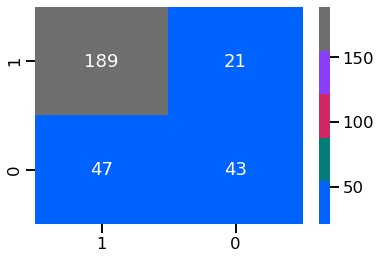

In [65]:
sns.set_context('talk')
ax = sns.heatmap(cm[0], annot=True, fmt='d', cmap=colors, xticklabels = [1, 0], yticklabels = [1, 0])

In [66]:
cm[0][0], cm[0][1]

(array([189,  21], dtype=int64), array([47, 43], dtype=int64))

# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [68]:
#Decision Tree with Grid Search
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring=specificity,
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [69]:
dt_GR = GR.predict(X_test)

# Random Forest

H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
H:\Users\Valhala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


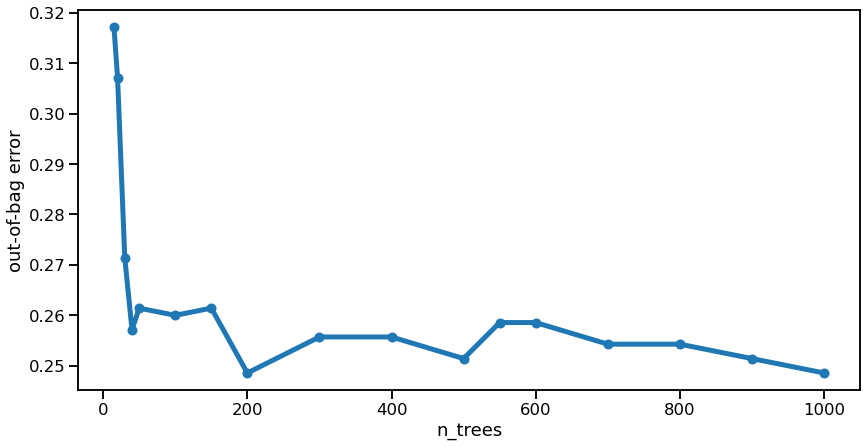

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 550, 600, 700, 800, 900, 1000]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [71]:
rf_model = RF.set_params(n_estimators=500)
rf_predict = rf_model.predict(X_test)

# Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.246667
25.0,0.223333
50.0,0.213333
100.0,0.220000
200.0,0.236667
400.0,0.246667


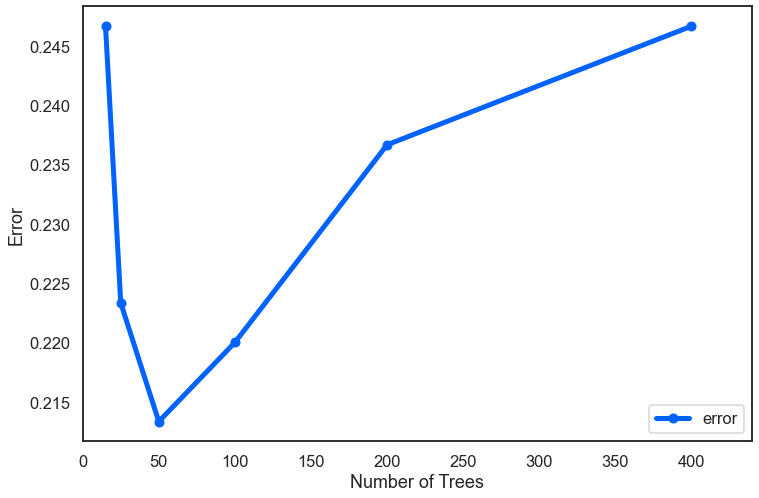

In [74]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette(palette)

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);
### END SOLUTION

In [75]:
# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [None, 'auto']}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring= scoring,
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [76]:
GV_GBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42, subsample=0.5)

In [77]:
gbc_predict = GV_GBC.predict(X_test)

# Support Vector Machine Classifier

In [78]:
from sklearn.svm import SVC

In [79]:
svc_model = SVC(C = 1, kernel = 'rbf', gamma = 'scale', class_weight = None, random_state = 42)
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)

In [80]:
svc_grid = {'C': [0.001, 0.01, 0.1, 1,10,20], 
            'kernel': ['rbf', 'poly', 'linear'], 
            'degree': [2, 3, 4, 5], 
            'gamma' : [[0.001, 0.01, 0.1, 1, 10, 20], 'scale', 'auto'], 
            'class_weight' : ['balanced', None]}
svc_GS = SVC(random_state = 42)
svc_GS_model = GridSearchCV(svc_GS, 
                            param_grid = svc_grid, 
                            scoring = scoring, 
                            n_jobs = -1)
svc_GS_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20],
                         'class_weight': ['balanced', None],
                         'degree': [2, 3, 4, 5],
                         'gamma': [[0.001, 0.01, 0.1, 1, 10, 20], 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='f1')

In [81]:
svc_GS_model.best_params_

{'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [82]:
svc_predict_GS = svc_GS_model.predict(X_test)

# Bagging Classifier

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
bagging_logistic = BaggingClassifier(base_estimator = LogisticRegression(),
                                    n_estimators = 20, 
                                    max_samples = 100, 
                                    warm_start = True, 
                                    random_state = 42).fit(X_train, y_train)
baglog_predict = bagging_logistic.predict(X_test)

In [85]:
bagging_boosting = BaggingClassifier(base_estimator = GradientBoostingClassifier(),
                                    n_estimators = 20,
                                    max_samples = 100,
                                    warm_start = True,
                                    oob_score = False,
                                    random_state = 42).fit(X_train, y_train)
bagboost_predict = bagging_boosting.predict(X_test)

In [86]:
bagging_grid = {'n_estimators' : [10, 20, 50], 
                'max_samples' : [1.0, 10.0, 20.0, 50.0, 100.0, 500.0],
                'max_features' : [1.0, 5.0, 10.0, 20.0], 
                'warm_start' : [True, False],
                'random_state' : [42]}
bagging_GS = BaggingClassifier(SVC(C = 1, kernel = 'rbf', gamma = 'auto', class_weight = None, random_state = 42))
bagging_GS_model = GridSearchCV(bagging_GS, 
                               param_grid = bagging_grid, 
                               scoring = scoring, 
                               n_jobs = -1).fit(X_train, y_train)
bagging_GS_predict = bagging_GS_model.predict(X_test)

In [87]:
bagging_GS_model.best_params_, bagging_GS_model.best_score_

({'max_features': 1.0,
  'max_samples': 1.0,
  'n_estimators': 50,
  'random_state': 42,
  'warm_start': True},
 0.8258442386532879)

In [88]:
bagging_GS_spct = BaggingClassifier(SVC(C = 10, kernel = 'rbf', gamma = 0.1, class_weight = None, random_state = 42))
bagging_GS_model_spct = GridSearchCV(bagging_GS_spct, 
                               param_grid = bagging_grid, 
                               scoring = specificity,  
                               n_jobs = -1).fit(X_train, y_train)
bagging_GS_predict_spct = bagging_GS_model_spct.predict(X_test)

In [89]:
bagging_GS_model_spct.best_params_, bagging_GS_model_spct.best_score_

({'max_features': 1.0,
  'max_samples': 1.0,
  'n_estimators': 50,
  'random_state': 42,
  'warm_start': True},
 0.5764329091960672)

In [95]:
bagging_GS_model_spct.best_estimator_

BaggingClassifier(base_estimator=SVC(C=10, gamma=0.1, random_state=42),
                  n_estimators=50, random_state=42, warm_start=True)

In [90]:
bagging_GS_spct = BaggingClassifier(SVC(C = 1, kernel = 'rbf', gamma = 'scale', class_weight = None, random_state = 42))
bagging_GS_model_npv = GridSearchCV(bagging_GS_spct, 
                               param_grid = bagging_grid, 
                               scoring = npv,  
                               n_jobs = -1).fit(X_train, y_train)
bagging_GS_predict_npv = bagging_GS_model_npv.predict(X_test)

In [91]:
bagging_GS_model_npv.best_params_, bagging_GS_model_npv.best_score_

({'max_features': 1.0,
  'max_samples': 1.0,
  'n_estimators': 10,
  'random_state': 42,
  'warm_start': True},
 0.34285714285714286)

# Metrics

In [93]:
predictions = [lr_predict, 
               lr_predict_l2, 
               lr_predict_gs, 
               svc_predict, 
               svc_predict_GS, 
               dt_predict, 
               dt_GR, 
               rf_predict, 
               gbc_predict, 
               baglog_predict, 
               bagboost_predict, 
               bagging_GS_predict, 
               bagging_GS_predict_spct, 
               bagging_GS_predict_npv]
labels = ['Logistic', 
          'Logistic L2', 
          'Logistic GS', 
          'SVC', 
          'SVC GS', 
          'Decision Tree', 
          'Decision Tree GS', 
          'Random Forest', 
          'Boosting', 
          'Log Bagging', 
          'Boost Bagging',
          'GS SVC Bagging F1', 
          'GS SVC Bagging Specificity', 
          'GS SVC Bagging NPV']
metrics = []
cm = []
for model, label in zip(predictions, labels):
    precision, recall, fscore, _ = score(y_test, model, average='binary')
    accuracy = accuracy_score(y_test, model)
    tnr = recall_score(y_test, model, pos_label = 0, average = 'binary')
    cm.append(confusion_matrix(y_test, model, labels = [1, 0]))
    metrics.append(pd.Series({'precision':precision, 
                              'recall':recall, 
                              'fscore':fscore,
                              'specificity':tnr, 
                              'NPV' : precision_score(y_test, model, pos_label = 0, average = 'binary'),
                              'accuracy':accuracy, }, name=label))
    num += 1
metrics = pd.concat(metrics, axis=1)
metrics.T

,precision,recall,fscore,specificity,NPV,accuracy
Logistic,0.800847,0.900000,0.847534,0.477778,0.671875,0.773333
Logistic L2,0.775194,0.952381,0.854701,0.355556,0.761905,0.773333
Logistic GS,0.803493,0.876190,0.838269,0.500000,0.633803,0.763333
SVC,0.768340,0.947619,0.848614,0.333333,0.731707,0.763333
SVC GS,0.803419,0.895238,0.846847,0.488889,0.666667,0.773333
Decision Tree,0.775120,0.771429,0.773270,0.477778,0.472527,0.683333
Decision Tree GS,0.730909,0.957143,0.828866,0.177778,0.640000,0.723333
Random Forest,0.771318,0.947619,0.850427,0.344444,0.738095,0.766667
Boosting,0.770115,0.957143,0.853503,0.333333,0.769231,0.770000
Log Bagging,0.784314,0.952381,0.860215,0.388889,0.777778,0.783333


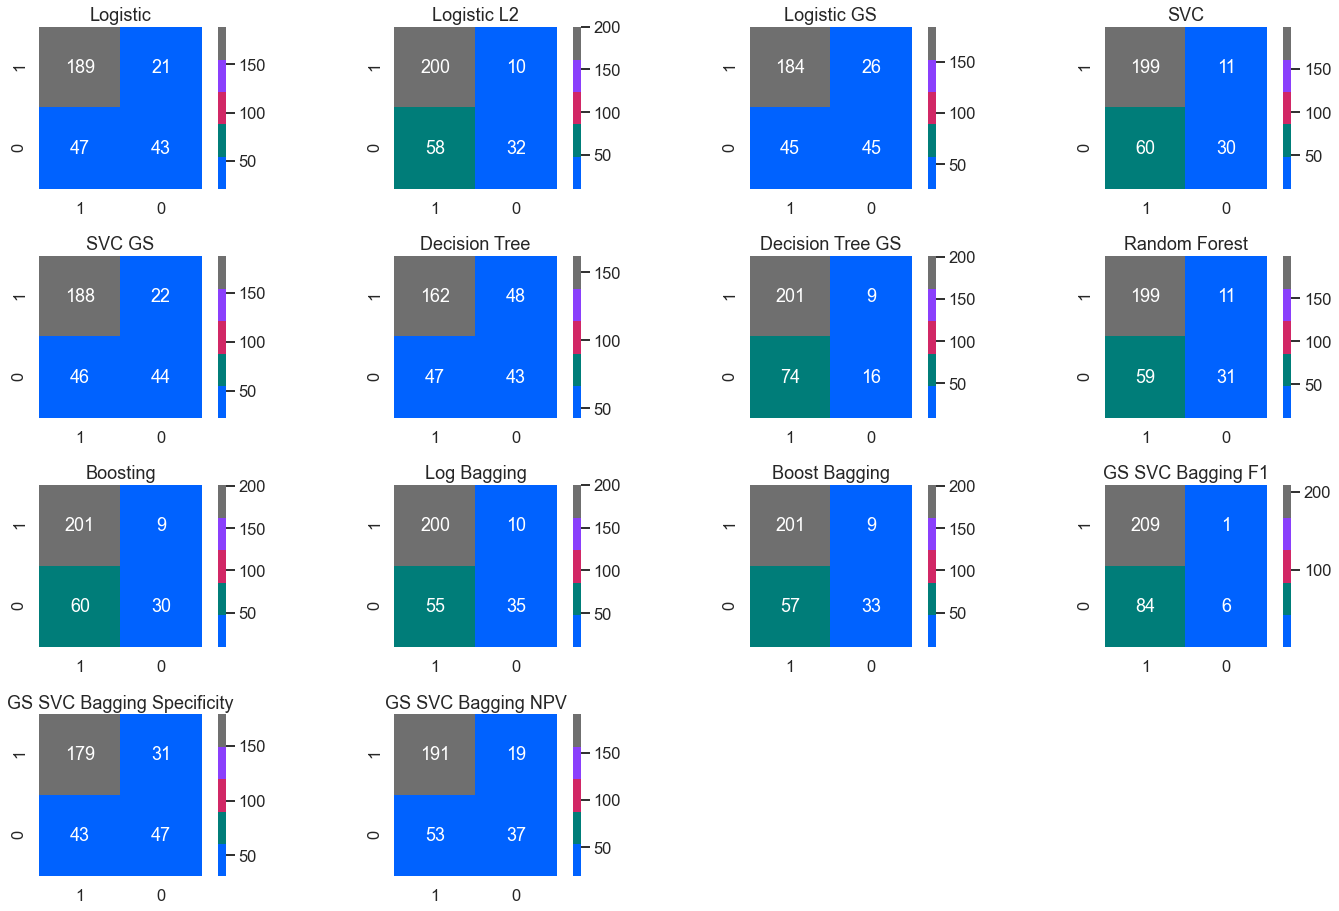

In [94]:
fig, axList = plt.subplots(nrows=4, ncols=4)
axList = axList.flatten()
fig.set_size_inches(20, 13)
sns.set_context('talk')
for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    if loc < len(cm):
        sns.heatmap(cm[loc], annot=True, fmt='d', cmap=colors, ax = ax, xticklabels = [1, 0], yticklabels = [1, 0], square = True)
        ax.set(title= labels[loc])
    else:
        ax.axis("off")
plt.tight_layout()